In [132]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
# Libraries for EDA
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

#Libraries for MLA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn import ensemble, tree, linear_model
from xgboost import XGBClassifier
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

In [134]:
# Upload the dataset and viewing the pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/Maternal_Health_Risk_DataSet.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [135]:
# Variables Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


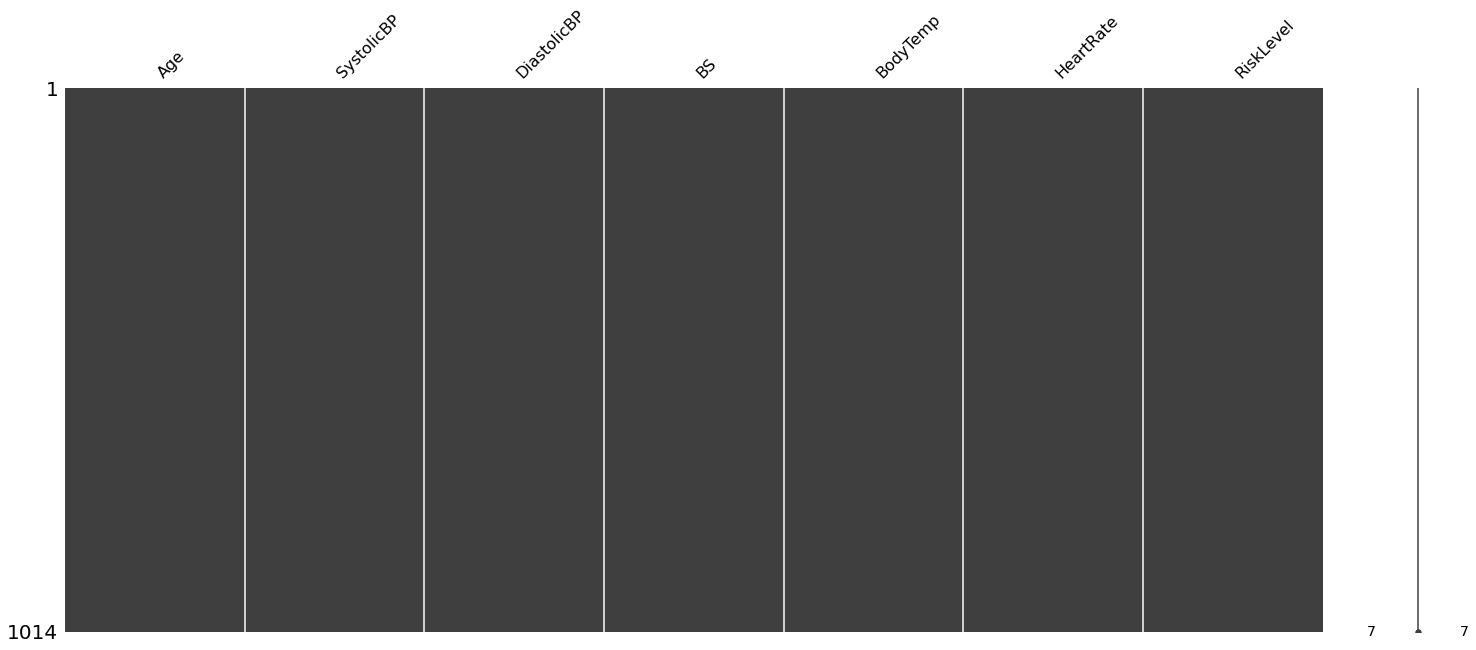

In [136]:
# Missing data with missing no visualization
msno.matrix(df)

In [137]:
# Risk level values (only for object dtype in df)
df.RiskLevel.value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [138]:
# Replace RiskLevel column values with integers to make a pairplot visualization
df['RiskLevel'] = df['RiskLevel'].replace({'low risk':1, 'mid risk': 2, 'high risk': 3})
df['RiskLevel']= df['RiskLevel'].astype('int')
df.head()
# df.RiskLevel.value_counts()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3
1,35,140,90,13.0,98.0,70,3
2,29,90,70,8.0,100.0,80,3
3,30,140,85,7.0,98.0,70,3
4,35,120,60,6.1,98.0,76,1


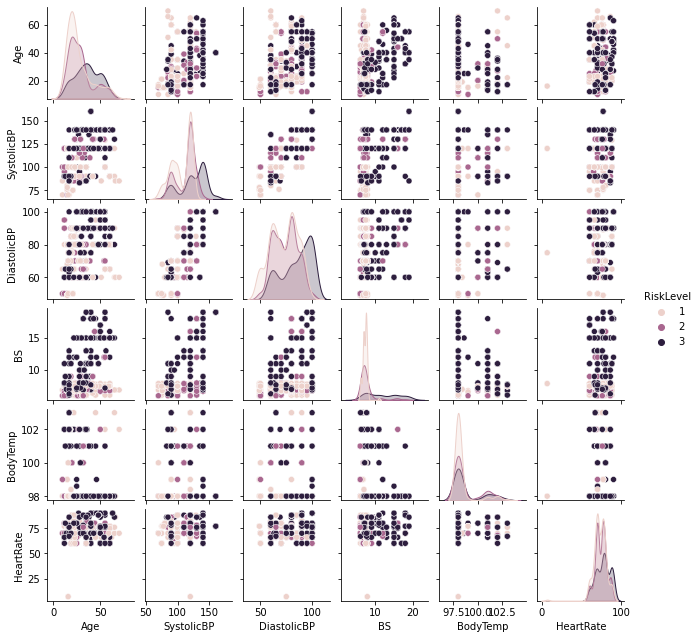

In [139]:
# Pairplot visualization with RiskLevel as hue
sns.pairplot(df,height=1.5,hue='RiskLevel')

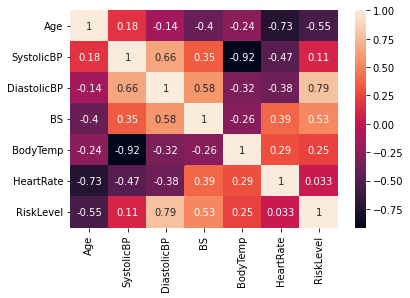

In [140]:
# Correlation between variables with a heatmap
sns.heatmap(df[:5].corr(method ='pearson'), annot=True)

The dataset is complete and does not have missing values

Heatmap correlation gives us insights as:

Age - Risk Level: -55% <br>
Age - Heart Rate: -73% <br>
Systolic BP - Body Temp: -92% <br>
Systolic BP - Diastolic BP: 66% <br>
Diastolic BP - Risk Level: 79% <br>
Diastolic BP - BS: 58% <br>

# Exploratory Data Analysis

## Age

In [141]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3
1,35,140,90,13.0,98.0,70,3
2,29,90,70,8.0,100.0,80,3
3,30,140,85,7.0,98.0,70,3
4,35,120,60,6.1,98.0,76,1


In [142]:
# Age in boxplot
fig = px.box(df, x="Age", points="all", width=800, height=200)
fig.show(renderer="colab")

In [143]:
# Age statistics
print('Age min: {age}'.format(age = df['Age'].min()))
print('Age max: {age}'.format(age = df['Age'].max()))
print('Age avg: {age}'.format(age = df['Age'].mean()))
print('Age median: {age}'.format(age = df['Age'].median()))
print('Age std: {age}'.format(age = df['Age'].std()))

Age min: 10
Age max: 70
Age avg: 29.871794871794872
Age median: 26.0
Age std: 13.474385532634372


In [144]:
# Age value count
data = df[['Age']].value_counts().reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.bar(data, x='Age', y='Count',width=800, height=400)
fig.update_layout(
    title='Number of people by Age',
    yaxis_title="Count")
fig.show(renderer="colab")

In [145]:
# Age in histogram
data = df[['Age']].value_counts().reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
data = data.sort_values(by='Age')
fig = px.histogram(data, x="Age", y="Count",nbins=20,width=800, height=400)
fig.update_layout(
    title='Age histogram',
    yaxis_title="Sum of count")
fig.show(renderer="colab")

Using the Age Categories, Life Cycle Group by Statistics Canada [5] we are going to cluster by Age for further analysis

In [146]:
#Use the age categories life cylce group by canada statistics department
sections = [(df['Age'] <= 14 ),\
           (df['Age'] >= 15) & (df['Age'] <=24),\
           (df['Age'] >= 25) & (df['Age'] <=64),\
           (df['Age'] > 64)]

choice =['children','youth','adult','senior']
df['Group'] = np.select(sections, choice)

#Visualization by Group
data = df[['Group']].value_counts(normalize=True).reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.bar(data, x='Group', y='Count',width=800, height=400)
fig.update_layout(
    title='Percent by Group',
    yaxis_title="Count")
fig.show(renderer="colab")

Conclusion for Age:

* The mean of the Age is 30
* The median of the column Age is 26
* Min Age is 10 and Max Age is 70.
* The standard deviation of the Age range is 13.5
* Higher number of people are below 35 having the count as 71 for 23 years, 67 for 19 years, 63 for 17 years and 60 for 15 years
* When we group the ages to attain the seniority level we get 54.3% of the group to be adults, 39.8% are youths, 5.3% are children and 0.4% are senior

## SystolicBP and DiastolicBP

In [147]:
# Top 5 values of SystolicBP and Diastolic BP
data = df[['SystolicBP','DiastolicBP']].value_counts().reset_index()
data.rename(columns={data.columns[2]:'count'}, inplace=True)
data.head()

,SystolicBP,DiastolicBP,count
0,120,80,204
1,120,90,112
2,90,60,67
3,140,100,63
4,90,65,53


In [148]:
# Box plot distribution for SystolicBP and Diastolic BP
fig = px.box(df, x="SystolicBP", points='all',width=800, height=200)
fig.show(renderer="colab")
fig = px.box(df, x="DiastolicBP", points='all',width=800, height=200)
fig.show(renderer="colab")

In [149]:
# SystolicBP values 
data = df[['SystolicBP']].value_counts(normalize =True).reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.histogram(data, x='SystolicBP', y='Count',nbins=20,width=600, height=400)
fig.update_layout(
    title='Systolic BP count',
    yaxis_title="Count")
fig.show(renderer="colab")

In [150]:
# Diastolic BP values
data = df[['DiastolicBP']].value_counts(normalize=True).reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.histogram(data, x='DiastolicBP', y='Count',nbins=20,width=600, height=400)
fig.update_layout(
    title='Diastolic BPcount',
    yaxis_title="Count")
fig.show(renderer="colab")

In [151]:
# Scatter plot between Sysolic and Diastolic Blood pressure by Group
data = df[['SystolicBP','DiastolicBP','Group']]
fig = px.scatter(df, x="SystolicBP", y="DiastolicBP",color="Group", trendline="ols",width=600, height=400)
fig.show(renderer="colab")

Use of Mayo Clinic categories for Systolic and Diastolic Blood Pressure [7] to categorize in sections

In [152]:
# Mayo clinic categories for SystolicBP
sections = [(df['SystolicBP'] < 120 ) & (df['DiastolicBP'] <80),\
           (df['SystolicBP'] >= 120) & (df['SystolicBP'] <=129) & (df['DiastolicBP'] < 80),\
           (df['SystolicBP'] >= 130) & (df['SystolicBP'] <=139) | (df['DiastolicBP'] >= 80) & (df['DiastolicBP'] <=89),\
           (df['SystolicBP'] >=140) | (df['DiastolicBP'] >= 90)]
choice =['normal','elevated','stage 1','stage 2']
df['Type'] = np.select(sections,choice)

In [153]:
data = df[['Type']].value_counts(normalize=True).reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
data = data.sort_values(by='Type')
fig = px.bar(data, x="Type", y="Count",width=800, height=400)
fig.update_layout(
    title='Histogram Representation',
    yaxis_title="Percent")
fig.show(renderer="colab")

In [154]:
# Scatter plot between Sysolic and Diastolic Blood pressure by Group
data = df[['SystolicBP','DiastolicBP','Type']]
fig = px.scatter(data, x="SystolicBP", y="DiastolicBP",color="Type", trendline="ols",width=600, height=400)
fig.show(renderer="colab")

Conclusion for Systolic and DyastolicBP

Systolic BP

* 44% of the population are between 120 - 124 bp
* Min is 70 & Max is 160 bp
* Q1: 100, Q2: 120, Q3: NONE

Diastolic BP

* 22% of the population are between 80 - 84 bp
* Min is 49 & Max is 100 bp
* Q1: 65, Q2: 80, Q3: 90

The systolic blood pressure measures the force of blood against the artery walls while the ventricles (the lower two chambers of your heart) squeezes resulting in pushing the blood to the rest of the body.

The diastolic blood pressure measures the force of blood against the artery walls as the heart relaxes and the ventricles are allowed to refill with blood. 

Diastole is this period of time when the heart relaxes between the beats (time taken by coronary artery to supply blood to your heart.

Between these two, there is a classification to find between a "normal" rate and an atypical one.

The Mayo clinic categories chart shows that 33% are normal, 32% are stage 1 hypertension, 26% are stage 2 hypertension and 7.6% are elevated.

## Blood Sugar level

In [155]:
# Boxplot distribution Blood sugar levels
fig = px.box(df, x="BS", points='all',width=800, height=200)
fig.show(renderer="colab")

In [156]:
# Histogram for BS-Level
data = df[['BS','Group']].value_counts().reset_index()
data.rename(columns={data.columns[2]:'Count'}, inplace=True)
fig = px.histogram(data, x='BS', y='Count',width=1000, height=400,nbins=40,facet_col='Group')
fig.update_layout(
    title='BS histogram',
    yaxis_title="Count")
fig.show(renderer="colab")

As per the clinical measure

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

In [157]:
# Mayo clinic categories for Blood sugar levels
sections = [(df['BS'] <= 8),\
           (df['BS'] > 8) & (df['BS'] <=11),\
           (df['BS'] > 11)
           ]
choice =['normal','prediabetes','diabetes']
df['BSlvl'] = np.select(sections,choice)

In [158]:
data = df[['BSlvl']].value_counts(normalize=True).reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
data = data.sort_values(by='BSlvl')
fig = px.bar(data, x="BSlvl", y="Count",width=800, height=400)
fig.update_layout(
    title='Blood Sugar level as histogram',
    yaxis_title="Percent")
fig.show(renderer="colab")

In [159]:
# BS-Level and Age relationship
fig = px.scatter(df, x="Age", y="BS",color="Group", trendline="ols",width=600, height=400)
fig.show(renderer="colab")

In [160]:
# SystolicBP & DiastolicBP and BS-Level relationship
fig = px.scatter(df, x="SystolicBP", y="BS",color="Group", trendline="ols",width=600, height=400)
fig.show(renderer="colab")
fig = px.scatter(df, x="DiastolicBP", y="BS",color="Group", trendline="ols",width=600, height=400)
fig.show(renderer="colab")

Conclusion for Blood sugar level

* 44% of the population are between 120 - 124 SystolicBP
* Min is 6 & Max is 19
* Q1: 6.9, Q2: 7.5, Q3: 8
* 76% of the dataset have a normal Blood Sugar Level
* There is a 58% of correlation between BS-Levels and DiastolicBP & 35% between BS-Levels and SystolicBP

BS-Levels are related to Age, SystolicBP and DiastolicBP as the variables increase and
the risk to have a high level of glucose in blood is related to lifestyle of different groups

## Body temperature

In [161]:
# Body Temperature in Histogram
data = df[['Group','BodyTemp']].value_counts().reset_index()
data.rename(columns={data.columns[2]:'Count'}, inplace=True)
fig = px.histogram(data, x='BodyTemp', y='Count',width=1000, height=400,nbins=40,facet_col='Group')
fig.update_layout(
    title='Body Temperature histogram',
    yaxis_title="Count")
fig.show(renderer="colab")

In [162]:
# Decoding the relationship between SystolicBP & DiastolicBP to Body Temperature
fig = px.scatter(df, x="SystolicBP", y="BodyTemp",color="Group", trendline="ols",width=600, height=400)
fig.show(renderer="colab")
fig = px.scatter(df, x="DiastolicBP", y="BodyTemp",color="Group", trendline="ols",width=600, height=400)
fig.show(renderer="colab")

Conclusion for Body Temperature

* In the youth and adult group almost the 80% of the count are between 98° - 99° (normal) while the children are around 40% and seniorare around 60%
* Body temperature over 100° can be because of any infectional disease
* As systolic and diastolic blood pressure increases, body temperature also increases but due to the regulatory effects, the body begins to adapt to its original temperature and this can cause the body temperature to decrease. 

This maybe the reason for -92% correlation between SystolicBP and Body Temperature

## Heart rate

In [163]:
# Heart Rate in Boxplot distribution
fig = px.box(df, x="HeartRate", points='all',facet_row='Group')
fig.show(renderer="colab")

In [164]:
# Heart Rate in Histogram
data = df[['HeartRate','Group']].value_counts().reset_index()
data.rename(columns={data.columns[2]:'Count'}, inplace=True)
fig = px.histogram(data, x='HeartRate', y='Count',width=1000, height=400,nbins=40,facet_col='Group')
fig.update_layout(
    title='Heart Rate histogram',
    yaxis_title="Count")
fig.show(renderer="colab")

In [165]:
# Relationship between Heart Rate and Age
fig = px.scatter(df, x="Age", y="HeartRate",color="Group", trendline="ols",width=600, height=400)
fig.show(renderer="colab")

In [166]:
# Relationship between Heart Rate and Body Temperature
fig = px.scatter(df, x="HeartRate", y="BodyTemp",color="Group", trendline="ols",width=600, height=400)
fig.show(renderer="colab")

Conclusion for Heart rate

Heart rate for children:

* Q1: 65, Q2: 70, Q3: 80
* Min: 60, Max: NONE

Heart rate for youths:

* Q1: NONE, Q2: 70, Q3: 77
* Min: 7, Max: 88
* Atypical Heart rate: 7 bpm

Heart rate for adults:

* Q1: 70, Q2: 76, Q3: 80
* Min: 60, Max: 90

Heart rate for seniors:

* Q1: 70, Q2: 76, Q3: 86
* Min: NONE, Max: NONE

As Age increases in Youth, Adult and Senior the correlation between Heart Rate is negative whereas in the Children group as the Age increases the correlation is positive.

## Risk level

In [167]:
# Heart Rate in Histogram
data = df[['RiskLevel','Group']].value_counts().reset_index()
data.rename(columns={data.columns[2]:'Count'}, inplace=True)
fig = px.histogram(data, x='RiskLevel', y='Count',width=1000, height=400,nbins=40,facet_col='Group')
fig.update_layout(
    title='Risk Level histogram',
    yaxis_title="Count")
fig.show(renderer="colab")

In [168]:
# Relationship between Risk Level and Age
fig = px.scatter(df, x="Age", y="RiskLevel",color="Group", trendline="ols",width=600, height=400)
fig.show(renderer="colab")

In [169]:
# Relationship between Heart Rate, Group & Age in Histogram
data = df[['RiskLevel','Group','Age']].value_counts().reset_index()
data.rename(columns={data.columns[3]:'Count'}, inplace=True)
fig = px.histogram(data, x='Age', y='Count',width=800, height=600,nbins=40,facet_col='Group',facet_row='RiskLevel')
fig.update_layout(
    title='Risk Level histogram')
fig.show(renderer="colab")

Conclusion for Risk Level

No of children in each risk level

* Risk level 1: 231
* Risk level 2: 137
* Risk level 3: 36

No of youths in each risk level

* Risk level 1: 152
* Risk level 2: 177
* Risk level 3: 222

No of adults in each risk level

* Risk level 1: 19
* Risk level 2: 22
* Risk level 3: 13

No of seniors in each risk level

* Risk level 1: 4
* Risk level 2: NONE
* Risk level 3: 1

As per the medical conditions and our analysis,

By looking at the Age and Risk Level scatter plot, the correlation between the Youth and Adult is positive while for the Senior is negative and Youth is none.

This can be explained as "Early childbearing can increase the risk for newborns as well as the young mothers. Babies born to the mothers under 20 years of age face higher risks of low birth weight, preterm delivery and severe neonatal disorders. 

Babies born to the elder mothers have a higher risk of certain chromosome problems like Down syndrome. The risk of pregnancy loss is higher by miscarriage and stillbirth increases as they get older. This is due to the pre-existing medical conditions or fetal chromosomal abnormalities.

# Machine Learning Analysis

In [170]:
# Create X and y variables
X = df.drop(['RiskLevel','Group','Type','BSlvl'], axis=1)
y = df.RiskLevel
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)
X_train.shape, X_test.shape

((811, 6), (203, 6))

In [171]:
# Scale the X dataset
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [172]:
# Using Machine Learning Algorithms listed below
MLA = [
    #Ensemble Methods
    ensemble.GradientBoostingClassifier(random_state=SEED),
    ensemble.RandomForestClassifier(random_state=SEED),
    
    #GLM
    linear_model.SGDClassifier(random_state=SEED),
    linear_model.LogisticRegression(random_state=SEED),

    #Trees    
    tree.DecisionTreeClassifier(random_state=SEED),
    tree.ExtraTreeClassifier(random_state=SEED),

    XGBClassifier(eval_metric="mlogloss"),
    CatBoostClassifier(silent=True,random_state=SEED)  
]

In [173]:
# Create a dataframe
MLA_compare = pd.DataFrame()

# Function for MLA to append to dataframe
def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test_scaled)
        classifier_accuracy_score = accuracy_score(y_test, y_pred)

        kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100
   
       # Print(MLA_name, "Done")
        row_index+=1

In [174]:
# Determining the accuracy for each MLA
MLA_testing(MLA=MLA, X_train=X_train_scaled, X_test=X_test)

MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,RandomForestClassifier,87.192118,82.494731
1,DecisionTreeClassifier,86.699507,82.121349
2,CatBoostClassifier,86.699507,82.738633
3,ExtraTreeClassifier,83.251232,80.271003
4,GradientBoostingClassifier,80.295567,78.297200
5,XGBClassifier,76.847291,74.846432
6,LogisticRegression,60.098522,63.250527
7,SGDClassifier,57.142857,59.302921


In [175]:
# Machine Learning Algorithm for Voting classifier using MLA selected algorithms
MLA = [
    # Ensemble Methods
    ('Random Forest',ensemble.RandomForestClassifier(random_state=SEED)),
    # Trees    
    ('Decision Tree',tree.DecisionTreeClassifier(random_state=SEED)),
    ('Extra Tree',tree.ExtraTreeClassifier(random_state=SEED)),
    
    ('XGB Classifier',XGBClassifier(eval_metric="mlogloss"))
   
]

# Initiate a VotingClassifier vc
vc = VotingClassifier(estimators=MLA)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f} %'.format(accuracy*100))

Voting Classifier: 86.700 %


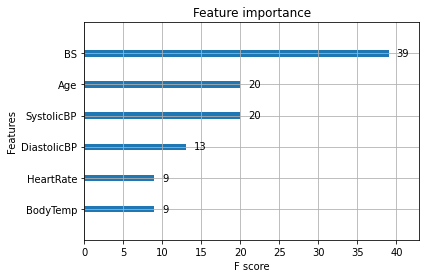

In [177]:
# Create the DMatrix
maternal_dmatrix = xgb.DMatrix(data = X, label = y)

params = {'eval_metric':"mlogloss"}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain=maternal_dmatrix,params=params,num_boost_round=5)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

# Conclusion

As we review the data collected from the prediction, most of the information are for women around 30 years old with a standard deviation of 13.5 being the top count among the ages in the children and youth categories. 

About the SystolicBP and DiastolicBP, looking at the Feature importance table we could not conclude that SytolicBP have more impact in the risk level prediction than the DiastolicBP but we can say that the SystolicBP has a 44% of the population around 120 - 124 bp while the Diastolic distribution being only 22% of the population between 80 - 84 bp (Mayo clinic "common" values"). 

The Blood Sugar Levels (BS-Levels) being the top one in Feature importance table would be an important factor for risk level. 76% of the dataset have normal Blood Sugar Level but only 44% of the population are between 120 - 124 bp (SystolicBP). BS-Levels are related to Age, SystolicBP and DiastolicBP as the variables increase. 

The risk to have a high level of glucose in blood is related to the lifestyle of different groups. The Body Temperature and Heart Rate in the Feature importance need more information to reduce the feature selection. For Body Temperature, the youth and adult groups have 80% (normal) while children only have 40% and seniors having 60%. We also need more information about the disease existance and to do more research on the correlation between the SytolicBP and Body Temperature. 

Heart rate could have an effect in Age and risk level but we need still more data to make the exact prediction. We are close to the perfect accuracy now.